
# IOD-Mini Project 1

## Overall Objective

To comprehensively analyze the current rental market in New Zealand.

## Specific Objectives

- Identify the distribution of rental properties in New Zealand.
- Examine rental price variations based on location
- Investigate the relationship between the number of rooms, property types, and rent prices.
- Analyze rent variations across different numbers of rooms.
- Determine the upfront cost of renting a property by assessing the mean bond/rent ratio across various dwelling types

## Data Source

To address the aforementioned objectives, data has been sourced from Market rent data collected from bonds lodged with tenancy service ofthin the Ministry of Business, Innovation and Employment (M.

## Limitations of the data source

The data provided shows recent market rents for non-government owned properties for which Tenancy Services holds information.This dataset does not include government own properties.

Dwelling type - Can take the values: Apartment, Boarding House, Flat, House, Room.In most cases if the dwelling type is not entered in a bond lodgement the dwelling is assumed to be a house
Random rounding for privacy protection: All (unsuppressed) counts (nlodged, nClosed ,nCurr) are also randomly rounded to a number divisible by three.
API.

#### Following sets of codes to use source data from API. First import all the libraries required for the project as below.

In [1]:
#Sourcing required libraries
import requests
import json
import pandas as pd
import urllib.request, json
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from ipyleaflet import Map, Marker, MarkerCluster

In [3]:
#env = "sandbox"
env = "prod"

In [4]:
if env == "sandbox":
    base_url="https://api.business.govt.nz/sandbox/tenancy-services/market-rent/v2/"
    hdr ={
        # Request headers
        'Cache-Control': 'no-cache',
        'Ocp-Apim-Subscription-Key': '###############################',
        }
if env == "prod":
    base_url="https://api.business.govt.nz/gateway/tenancy-services/market-rent/v2/"
    hdr ={
        # Request headers
        'Cache-Control': 'no-cache',
        'Ocp-Apim-Subscription-Key': '#################################',
        }

In [5]:
# To get all the area definition
try:
    url_area_definitions = base_url + "area-definitions"

    req_area_definitions = requests.get(url_area_definitions, headers=hdr)

    # Accessing JSON response
    json_response_area_definitions = req_area_definitions.json()

    print(json_response_area_definitions)
except Exception as e:
    print(e)

{'tableName': 'area-definitions', 'items': [{'label': 'regional-council-2016', 'code': 'REGC2016'}, {'label': 'regional-council-2019', 'code': 'REGC2019'}, {'label': 'territorial-authority-2016', 'code': 'TA2016'}, {'label': 'territorial-authority-2019', 'code': 'TA2019'}, {'label': 'ward-2016', 'code': 'WARD2016'}, {'label': 'ward-2019', 'code': 'WARD2019'}, {'label': 'urban-area-2016', 'code': 'UA2016'}, {'label': 'urban-area-2019', 'code': 'UA2019'}, {'label': 'statistical-area-unit-2016', 'code': 'AU2016'}, {'label': 'statistical-area-unit-2019', 'code': 'SAU2019'}, {'label': 'internet-market-rent-2017', 'code': 'IMR2017'}, {'label': 'internet-market-rent-2005', 'code': 'IMR2005'}, {'label': 'user-defined', 'code': 'USERDEFINED'}, {'label': 'AS2017', 'code': 'AS2017'}]}


In [6]:
# To get the area definition for TA2019
try:
    url_ad_ta2019 =  base_url + "/area-definitions/TA2019"

    req_ad_ta2019 = requests.get(url_ad_ta2019, headers=hdr)

    json_response_ad_ta2019 = req_ad_ta2019.json()

    print(json_response_ad_ta2019)
except Exception as e:
    print(e)

{'tableName': 'TA2019', 'items': [{'label': 'Far North District', 'code': '001'}, {'label': 'Whangarei District', 'code': '002'}, {'label': 'Kaipara District', 'code': '003'}, {'label': 'Thames-Coromandel District', 'code': '011'}, {'label': 'Hauraki District', 'code': '012'}, {'label': 'Waikato District', 'code': '013'}, {'label': 'Matamata-Piako District', 'code': '015'}, {'label': 'Hamilton City', 'code': '016'}, {'label': 'Waipa District', 'code': '017'}, {'label': 'Otorohanga District', 'code': '018'}, {'label': 'South Waikato District', 'code': '019'}, {'label': 'Waitomo District', 'code': '020'}, {'label': 'Taupo District', 'code': '021'}, {'label': 'Western Bay of Plenty District', 'code': '022'}, {'label': 'Tauranga City', 'code': '023'}, {'label': 'Rotorua District', 'code': '024'}, {'label': 'Whakatane District', 'code': '025'}, {'label': 'Kawerau District', 'code': '026'}, {'label': 'Opotiki District', 'code': '027'}, {'label': 'Gisborne District', 'code': '028'}, {'label':

In [7]:
# To get the area definition SAU2019
try:
    url_ad_sau2019 =  base_url + "/area-definitions/SAU2019"

    req_ad_sau2019 = requests.get(url_ad_sau2019, headers=hdr)

    json_response_ad_sau2019 = req_ad_sau2019.json()

    print(json_response_ad_sau2019)
except Exception as e:
    print(e)

{'tableName': 'SAU2019', 'items': [{'label': 'North Cape', 'code': '100100'}, {'label': 'Rangaunu Harbour', 'code': '100200'}, {'label': 'Inlets Far North District', 'code': '100300'}, {'label': 'Karikari Peninsula', 'code': '100400'}, {'label': 'Tangonge', 'code': '100500'}, {'label': 'Ahipara', 'code': '100600'}, {'label': 'Kaitaia East', 'code': '100700'}, {'label': 'Kaitaia West', 'code': '100800'}, {'label': 'Rangitihi', 'code': '100900'}, {'label': 'Oruru-Parapara', 'code': '101000'}, {'label': 'Taumarumaru', 'code': '101100'}, {'label': 'Herekino-Takahue', 'code': '101200'}, {'label': 'Peria', 'code': '101300'}, {'label': 'Taemaro-Oruaiti', 'code': '101400'}, {'label': 'Whakapaku', 'code': '101500'}, {'label': 'Hokianga North', 'code': '101600'}, {'label': 'Kohukohu-Broadwood', 'code': '101700'}, {'label': 'Whakarara', 'code': '101800'}, {'label': 'Kaeo', 'code': '101900'}, {'label': 'Omahuta Forest-Horeke', 'code': '102000'}, {'label': 'Hokianga South', 'code': '102100'}, {'lab

In [8]:
# for SAU2019 get data for specific period.
try:
    url_statistics =  base_url + "statistics"
    params = {
        'area-definition': 'SAU2019',
        'period-ending': '2024-02',
        'num-months': '24'
    }
    
    res_statistics = requests.get(url_statistics, headers=hdr, params=params)
    
    print(res_statistics.status_code)
except Exception as e:
    print(e)


200


In [9]:
#Convert data into a Dataframe
json_response_statistics = {}
if res_statistics.status_code == 200 :
    json_response_statistics = res_statistics.json()
    
    # Convert JSON response into DataFrame
    df_rent_stat = pd.DataFrame(json_response_statistics)
    
    print(df_rent_stat.shape)
    df_rent_stat.info()
else:
     print("Failed to fetch data from statistics API:", res_statistics.status_code)

(10402, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10402 entries, 0 to 10401
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   items           10402 non-null  object
 1   periodCovered   10402 non-null  object
 2   areaDefinition  10402 non-null  object
dtypes: object(3)
memory usage: 243.9+ KB


In [10]:
df_rent_stat.head()

,items,periodCovered,areaDefinition
0,"{'area': 'Abbey Caves-Glenbervie', 'dwell': 'H...",2022-3-1/2024-2-29,SAU2019
1,"{'area': 'Abbey Caves-Glenbervie', 'dwell': 'H...",2022-3-1/2024-2-29,SAU2019
2,"{'area': 'Abbotsford', 'dwell': 'House', 'nBed...",2022-3-1/2024-2-29,SAU2019
3,"{'area': 'Abbotsford', 'dwell': 'House', 'nBed...",2022-3-1/2024-2-29,SAU2019
4,"{'area': 'Abbotsford', 'dwell': 'House', 'nBed...",2022-3-1/2024-2-29,SAU2019


In [11]:
# Create DataFrame by expanding items column and dropping periodCovered and areaDefinition
if not json_response_statistics == {}:
    df = pd.DataFrame(json_response_statistics['items'])
    
    # Print DataFrame
    df.head()
    
    print(df.shape)
    df.info()

else:
    print("The variable json_response_statistics is None.")



(10402, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10402 entries, 0 to 10401
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     10402 non-null  object 
 1   dwell    10402 non-null  object 
 2   nBedrms  10402 non-null  object 
 3   nLodged  10402 non-null  int64  
 4   nClosed  10402 non-null  int64  
 5   nCurr    10402 non-null  int64  
 6   mean     10400 non-null  float64
 7   lq       10400 non-null  float64
 8   med      10400 non-null  float64
 9   uq       10400 non-null  float64
 10  sd       10381 non-null  float64
 11  brr      10400 non-null  float64
 12  lmean    10400 non-null  float64
 13  lsd      10399 non-null  float64
 14  slq      10399 non-null  float64
 15  suq      10399 non-null  float64
dtypes: float64(10), int64(3), object(3)
memory usage: 1.3+ MB


In [12]:
# Print DataFrame
df.head()

,area,dwell,nBedrms,nLodged,nClosed,nCurr,mean,lq,med,uq,sd,brr,lmean,lsd,slq,suq
0,Abbey Caves-Glenbervie,House,3,9,3,15,627.0,610.0,630.0,660.0,54.0,4.00,6.4379,0.0888,589.0,664.0
1,Abbey Caves-Glenbervie,House,4,6,6,9,711.0,650.0,690.0,750.0,77.0,3.70,6.5625,0.1049,660.0,760.0
2,Abbotsford,House,2,6,9,6,506.0,420.0,490.0,550.0,97.0,3.49,6.2124,0.1865,440.0,566.0
3,Abbotsford,House,3,30,21,54,555.0,525.0,550.0,600.0,105.0,3.74,6.2937,0.2530,456.0,642.0
4,Abbotsford,House,4,6,6,9,663.0,638.0,655.0,680.0,58.0,3.94,6.4932,0.0864,623.0,700.0


##### In order to understand the data frame, I have examined the column names with given names.

###### Column definition

- **nLodged** - Number of bonds lodged at some point in the period.  Note random rounding is applied to this value.
- **nClosed** - Number of bonds closed at some point in the period.  Note random rounding is applied to this value.
- **nCurr** - Total number of bonds active at the end of the period.  Note random rounding is applied to this value.
- **mean** - Mean weekly rent of bonds lodged within the period.
- **lq** - Lower Quartile weekly rent; weekly rent of the bond that is at the 25th percentile of bonds lodged in the period 
- **med** - Median weekly rent; weekly rent of the bond that is at the 50th percentile of bonds lodged in the period 
- **uq** - Upper Quartile weekly rent; weekly rent of the bond that is at the 75th percentile of bonds lodged in the period 
- **sd** - Sample Standard Deviation of weekly rent
- **brr** - Mean Bond/Rent Ratio
- **lmean** - Mean of natural logarithm weekly rent.  Note that exp(lmean) == Geometric mean is a good estimate of the median as rent is log normally distributed so can be thought of as the "Synthetic median" of market rent consistent with the other synthetic statistics below
- **lsd** - sample standard deviation of natural logarithm weekly rent of bonds lodged within the period
- **slq** - Synthetic Lower Quartile Weekly Rent.  This is defined as exp(lmean + qnorm(0.25) * lsd) and is a reasonable estimate of the lower quartile 
- **suq** - Synthetic Upper Quartile Weekly Rent.  This is defined as exp(lmean + qnorm(0.75) * lsd) and is a reasonable estimate of the upper quartile 

#### Data Profiling

In order to understand Data frame following tasks being completed

Construct a dictionary with column names and their minimum and maximum values
- To identfy the nature of data distribution- Histograms being drawn for `nBedrms`,`mean`,`lq`,`med`, `uq` parameters
- Find out distinct number of dwell column and number of samples in each dwell in the dataset
- Identify the data distribution of mean rent through scatterplot
- Scatter plot for Mean rent and dwelling types
- Boxplot on mean rent and dwelling types
- Joint plot for Number of rooms, Mean rent and dwelling types


##### Objective of following code is to identify variation of the data

In [13]:
# Construct a dictionary with column names and their minimum and maximum values
min_max_dict = {col: (df[col].min(), df[col].max()) for col in df.columns}

# Print the result
for column, (min_val, max_val) in min_max_dict.items():
    print(f"Column: {column}, Min: {min_val},      Max: {max_val}")

Column: area, Min: Abbey Caves-Glenbervie,      Max: Yelverton
Column: dwell, Min: Apartment,      Max: Room
Column: nBedrms, Min: 1,      Max: NA
Column: nLodged, Min: 6,      Max: 2430
Column: nClosed, Min: 0,      Max: 1704
Column: nCurr, Min: 0,      Max: 4020
Column: mean, Min: 78.0,      Max: 4969.0
Column: lq, Min: 61.0,      Max: 1700.0
Column: med, Min: 78.0,      Max: 1800.0
Column: uq, Min: 81.0,      Max: 3000.0
Column: sd, Min: 2.0,      Max: 8857.0
Column: brr, Min: 0.87,      Max: 500.35
Column: lmean, Min: 4.3552,      Max: 7.7268
Column: lsd, Min: 0.0,      Max: 2.3184
Column: slq, Min: 53.0,      Max: 1576.0
Column: suq, Min: 82.0,      Max: 4824.0


##### Objective - Visualize data distribution of different columns.

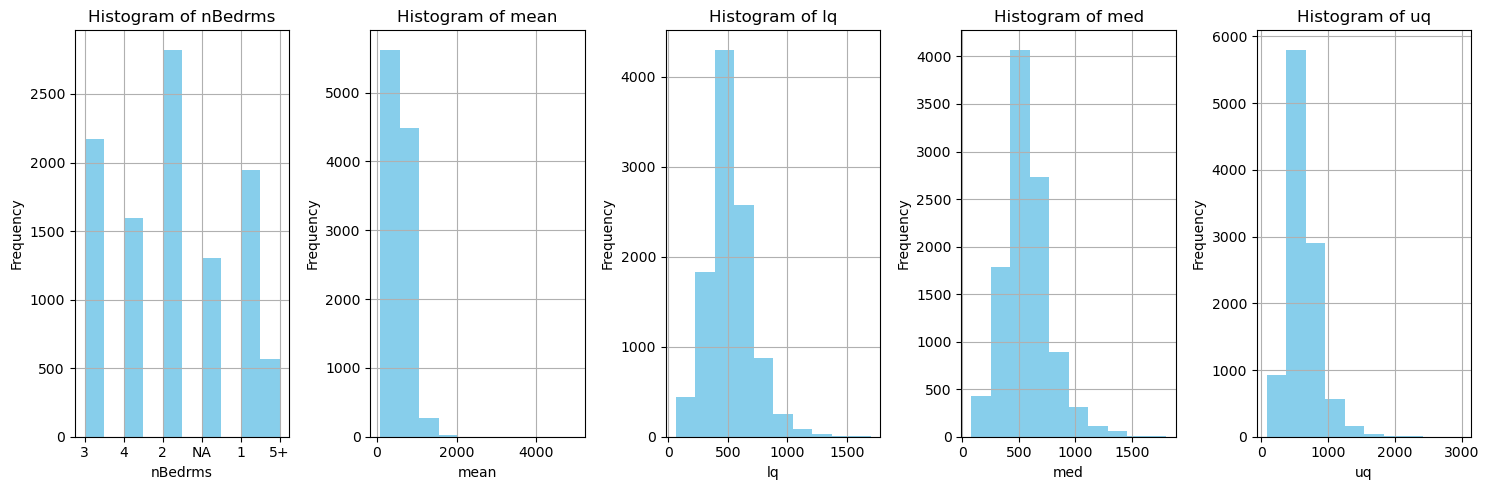

In [14]:
# List of columns to create histograms
columns_to_plot = ['nBedrms','mean','lq','med','uq']

# Set up subplots
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 5))

# Iterate over each column and create a histogram
for i, column in enumerate(columns_to_plot):
    ax = axes[i] if num_plots > 1 else axes
    ax.hist(df[column], bins=10, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# Get distinct number of dwell
distinct_dwell = df['dwell'].nunique()

# Get number of samples for each species
samples_per_dwell = df['dwell'].value_counts()

print("Distinct number of dwell:", distinct_dwell)
print("\nNumber of samples for each dwell:")
print(samples_per_dwell)

Distinct number of dwell: 5

Number of samples for each dwell:
dwell
House             7277
Flat              1413
Apartment         1156
Room               369
Boarding House     187
Name: count, dtype: int64


##### Following scatterplot create to identify the outliers and the effect for the analysis. Eventhough their are outliers, Not removed outliers as the final analysis focus on rent market analysis.

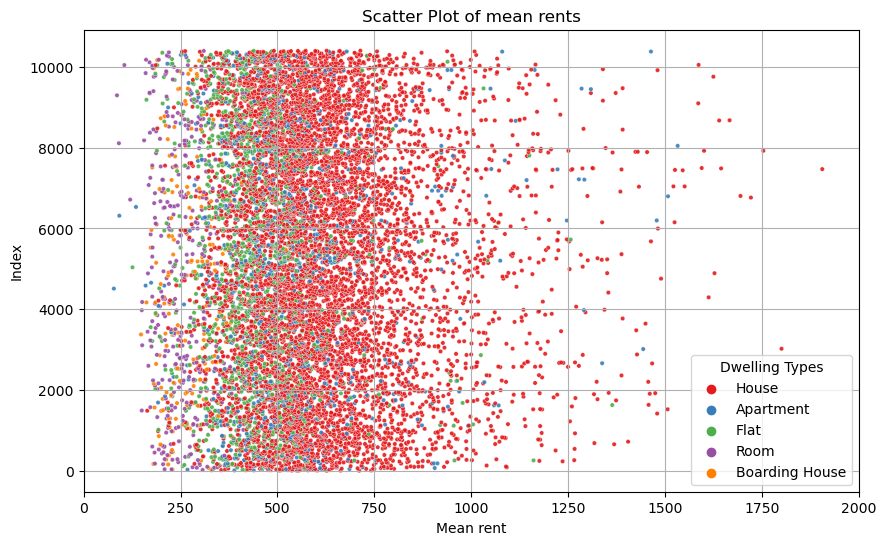

In [16]:
# Set up the scatter plot
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='mean', y=df.index, hue='dwell', palette='Set1',alpha=0.9, s=10)


# Set labels and title
plt.xlabel('Mean rent')
plt.ylabel('Index')
plt.title('Scatter Plot of mean rents')

# Set x-axis range
plt.xlim(0, 2000)

# Show legend
plt.legend(title='Dwelling Types')

# Show the plot
plt.grid(True)
plt.show()

##### Objective of following code is to identify the data points in different dwelling categories and its distribution based on number of rooms. It gives the idea that the analysis bneeds to focused on Apartment, Houses and flats in rental market.

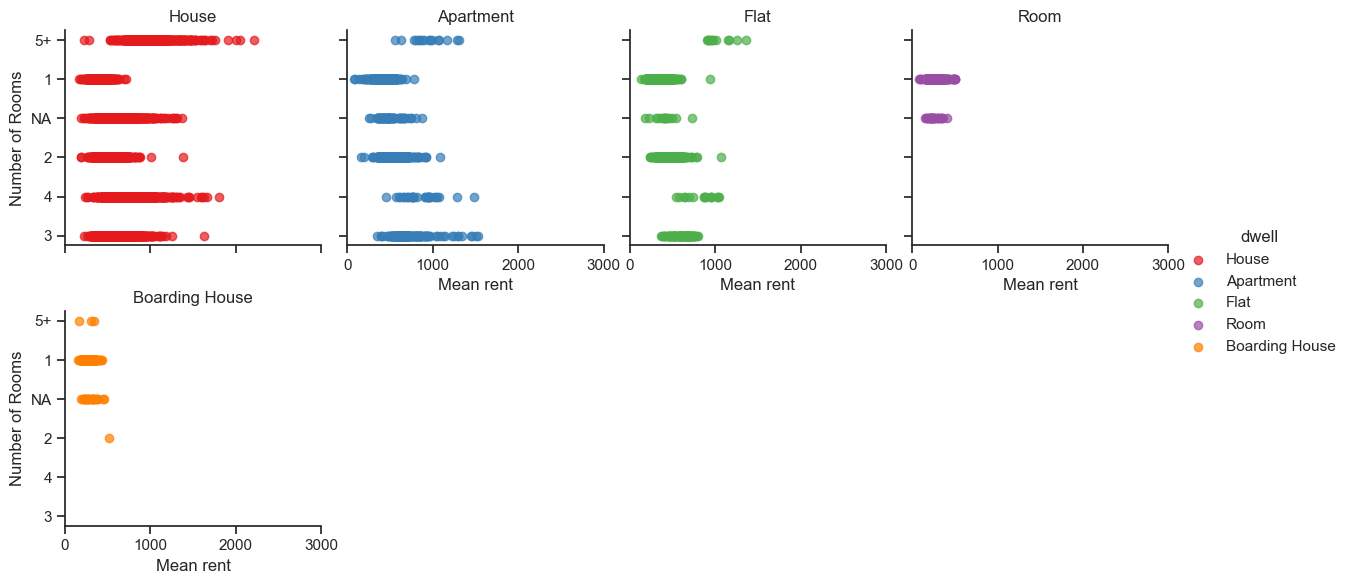

In [17]:
# Set the style of the seaborn plot
sns.set(style="ticks")

# Create a FacetGrid using the DataFrame
dwelling_group= sns.FacetGrid(df, col="dwell", hue="dwell", palette="Set1", col_wrap=4)

# Map the scatterplot onto the FacetGrid
dwelling_group.map(plt.scatter, "mean", "nBedrms", alpha=0.7)

#Set a limit to show
plt.xlim(0, 3000)

# Set labels and title
dwelling_group.set_axis_labels("Mean rent", "Number of Rooms")
plt.title('Scatter Plot of mean rents by dwelling type')

# Adjust the plot appearance
dwelling_group.set_titles(col_template="{col_name}")

# Add a legend
dwelling_group.add_legend()

# Show the plot
plt.show()

##### Following box plot created to identify the market price trend in different dwelling types as a support for final analysis. This visualisation confirms that more focus needs to be given to Apartments, Houses and flats as it covers significance portion of dataset.

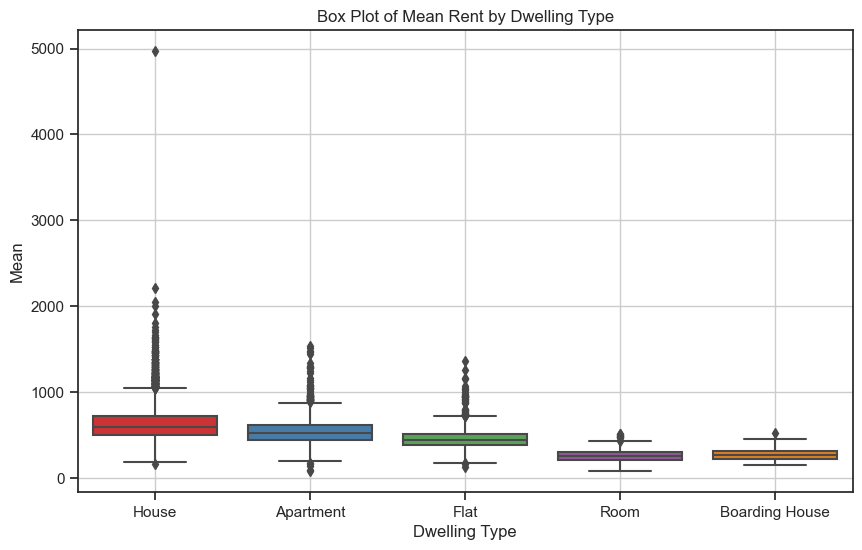

In [18]:
# Set up the box plot
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=df, x='dwell', y='mean', palette='Set1')

# Set labels and title
plt.xlabel('Dwelling Type')
plt.ylabel('Mean')
plt.title('Box Plot of Mean Rent by Dwelling Type')

# Show the plot
plt.grid(True)
plt.show()

#### Following set of activities has done for Ddata Wrangling and feature emgineering.

- Identifying and managing Null values
- Bringing and merging Longitudinal and Latitudinal Data into the dataframe.


In [19]:
#Identifying how many nuulls in the dataframe altogether
total_nulls = df.isnull().sum().sum()
print("Total number of nulls in df:", total_nulls)

#which columns contained nulls nad number of datapoints with null
df.isnull().sum()



Total number of nulls in df: 42


area        0
dwell       0
nBedrms     0
nLodged     0
nClosed     0
nCurr       0
mean        2
lq          2
med         2
uq          2
sd         21
brr         2
lmean       2
lsd         3
slq         3
suq         3
dtype: int64

Category: House
Descriptive Statistics:
count     7277
unique       6
top          3
freq      1904
mode         3
Name: nBedrms, dtype: object


C:\Users\user\anaconda3\envs\mini_project_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


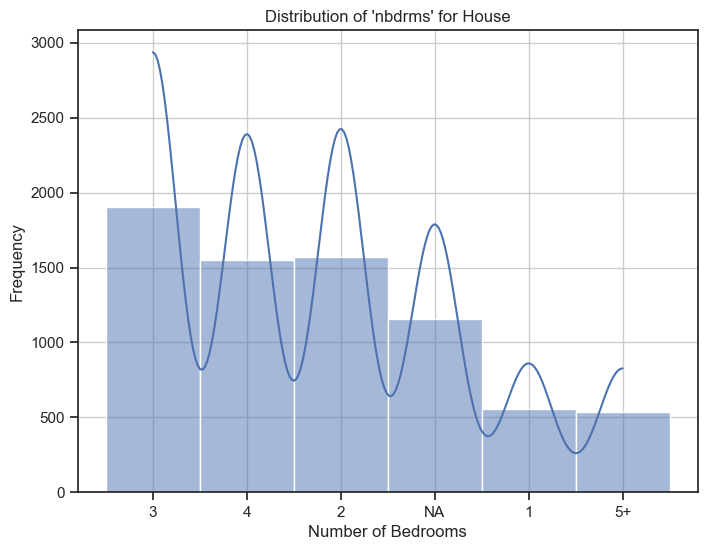

Category: Apartment
Descriptive Statistics:
count     1156
unique       6
top          2
freq       510
mode         2
Name: nBedrms, dtype: object


C:\Users\user\anaconda3\envs\mini_project_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


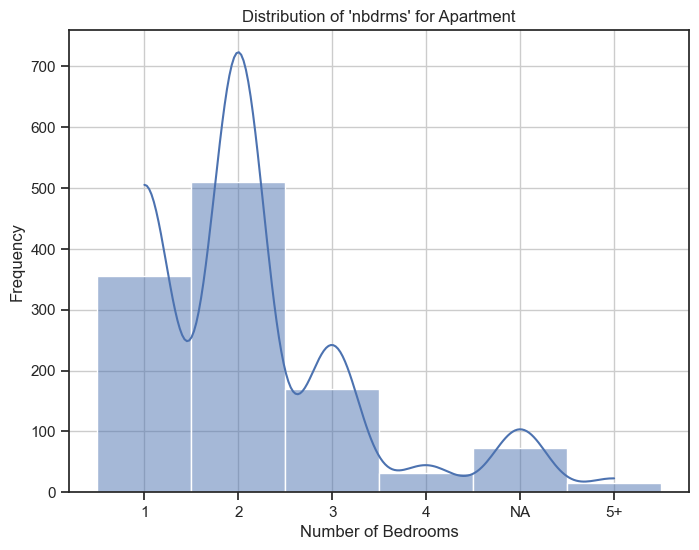

Category: Flat
Descriptive Statistics:
count     1413
unique       6
top          2
freq       740
mode         2
Name: nBedrms, dtype: object


C:\Users\user\anaconda3\envs\mini_project_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


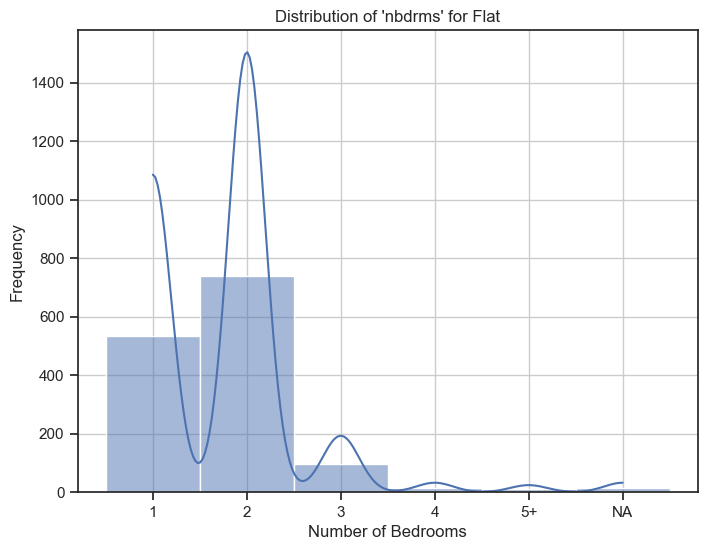

Category: Room
Descriptive Statistics:
count     369
unique      2
top         1
freq      341
mode        1
Name: nBedrms, dtype: object


C:\Users\user\anaconda3\envs\mini_project_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


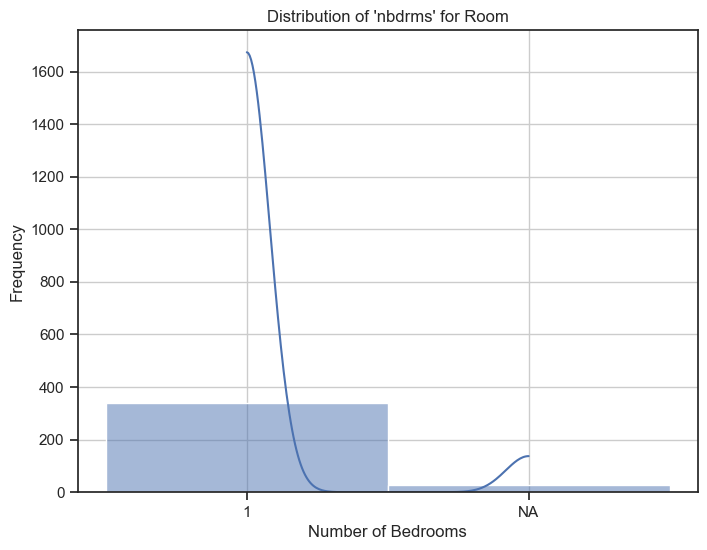

Category: Boarding House
Descriptive Statistics:
count     187
unique      4
top         1
freq      157
mode        1
Name: nBedrms, dtype: object


C:\Users\user\anaconda3\envs\mini_project_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


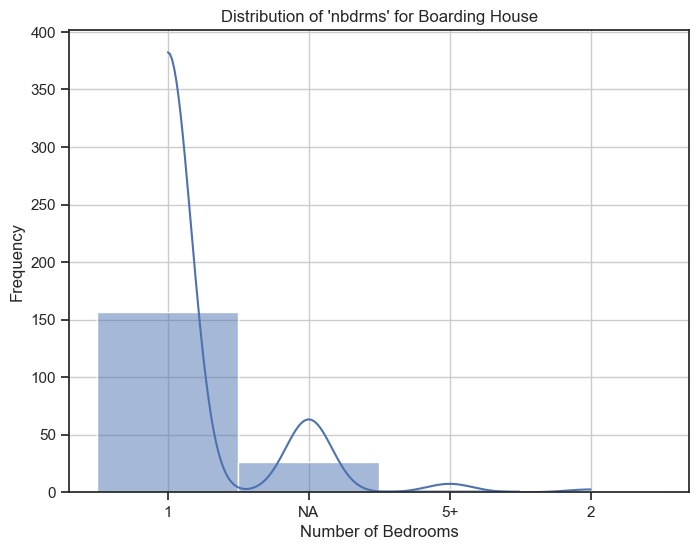

In [20]:
#Finding logical method to fill the null values in Nbdrm column
#creating histogram of nbdrms in dwell types taking only non null nbdrms rows
# Filter the DataFrame to remove rows with null 'nbdrms' values
# Separate data by 'dwell' categories
dwell_categories = df['dwell'].unique()
for category in dwell_categories:
    subset = df[df['dwell'] == category]
    
    # Analyze distribution of non-null values for 'nbdrms' column
    non_null_values = subset['nBedrms'].dropna()
    print(f"Category: {category}")
    print("Descriptive Statistics:")
    descriptive_stats = non_null_values.describe()
    mode = non_null_values.mode()
    descriptive_stats['mode'] = mode.iloc[0] if not mode.empty else 'N/A'
    print(descriptive_stats)
    
    # Visualize distribution using histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data=non_null_values, bins=10, kde=True)
    plt.title(f"Distribution of 'nbdrms' for {category}")
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

##### Filling null values of nBedrms column
Taking into account the statistical overview of the bedroom column across different dwelling categories in the DataFrame, it seems reasonable to use mean or median imputation to address missing values of number of bedroom column. Given that bedrooms are represented as integers, rounding off mean and median imputations essentially mirrors the concept of mode. As a result,I'm opting to use the mode of each dwelling type to fill in any missing values in nBedrms column.

##### Null values of  sd column
The total number of null values in the 'sd' column is 20, which accounts for approximately 0.19% of the entire DataFrame. Considering this small proportion, I have decided to remove the rows with null values in the 'sd' column. This action is deemed insignificant for the final analysis.

In [21]:
#Removing null values

# Drop rows with null values in 'sd' column
df_1 = df.dropna(subset=['sd'])

# Define a function to fill null values in 'nBedrms' column with mode for each category in 'dwell' column
def fill_null_nBedrms_grouped(series):
    mode_value = series.mode()
    return series.fillna(mode_value[0] if not mode_value.empty else None)

def fill_null_nBedrms(df):
    mode_per_dwell = df.groupby('dwell')['nBedrms'].transform(fill_null_nBedrms_grouped)
    return df.assign(nBedrms=mode_per_dwell)

# Apply the function to fill null values in 'nBedrms' column
df_2 = fill_null_nBedrms(df_1)

# Verify no null values in the final DataFrame
print(df_2.isnull().sum())



area       0
dwell      0
nBedrms    0
nLodged    0
nClosed    0
nCurr      0
mean       0
lq         0
med        0
uq         0
sd         0
brr        0
lmean      0
lsd        0
slq        0
suq        0
dtype: int64


#### Feature Engineering

Inorder to see the rental properties in its geographical locations, I have bring latitude and longitudinal data of the area column by mapping it with another CSV file.

In [22]:
#Bringing Geo location data intodataframe
geo_data = pd.read_table(r"C:\Users\user\Downloads\Prathibhani_IOD_Mini_Project\statistical-area-2-2019-centroid-true.csv", sep=r'[\t,;\n]',engine='python')
geo_data.head()

,WKT,SA22019_V1_00,SA22019_V1_00_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,LATITUDE,LONGITUDE,EASTING,NORTHING,Shape_X,Shape_Y
0,"""POINT (1593572.45675 6170194.8842)""",100100,North Cape,826.768156,826.768156,-34.610072,172.929893,1.593572e+06,6.170195e+06,1.593572e+06,6.170195e+06
1,"""POINT (1618239.69885 6131279.6561)""",100200,Rangaunu Harbour,272.075009,272.075009,-34.960856,173.199788,1.618240e+06,6.131280e+06,1.618240e+06,6.131280e+06
2,"""POINT (1663916.73625 6112746.32665)""",100300,Inlets Far North District,0.000000,626.096381,-35.126112,173.701517,1.663917e+06,6.112746e+06,1.663917e+06,6.112746e+06
3,"""POINT (1633415.8049 6134785.62115)""",100400,Karikari Peninsula,174.188093,174.188093,-34.928854,173.365877,1.633416e+06,6.134786e+06,1.633416e+06,6.134786e+06
4,"""POINT (1616675.87775 6109747.0993)""",100500,Tangonge,177.208502,177.208502,-35.155048,173.183092,1.616676e+06,6.109747e+06,1.616676e+06,6.109747e+06


In [23]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WKT                 2239 non-null   object 
 1   SA22019_V1_00       2239 non-null   int64  
 2   SA22019_V1_00_NAME  2239 non-null   object 
 3   LAND_AREA_SQ_KM     2239 non-null   float64
 4   AREA_SQ_KM          2239 non-null   float64
 5   LATITUDE            2239 non-null   float64
 6   LONGITUDE           2239 non-null   float64
 7   EASTING             2239 non-null   float64
 8   NORTHING            2239 non-null   float64
 9   Shape_X             2239 non-null   float64
 10  Shape_Y             2239 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 192.5+ KB


In [24]:
#Merge the DataFrames using different key names
merge_df = pd.merge(df_2, geo_data, left_on='area', right_on='SA22019_V1_00_NAME')
print(merge_df.shape)
merge_df.head()

(10362, 27)


,area,dwell,nBedrms,nLodged,nClosed,nCurr,mean,lq,med,uq,...,SA22019_V1_00,SA22019_V1_00_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,LATITUDE,LONGITUDE,EASTING,NORTHING,Shape_X,Shape_Y
0,Abbey Caves-Glenbervie,House,3,9,3,15,627.0,610.0,630.0,660.0,...,106700,Abbey Caves-Glenbervie,32.117477,32.117477,-35.703991,174.361228,1.723145e+06,6.048029e+06,1.723145e+06,6.048029e+06
1,Abbey Caves-Glenbervie,House,4,6,6,9,711.0,650.0,690.0,750.0,...,106700,Abbey Caves-Glenbervie,32.117477,32.117477,-35.703991,174.361228,1.723145e+06,6.048029e+06,1.723145e+06,6.048029e+06
2,Abbotsford,House,2,6,9,6,506.0,420.0,490.0,550.0,...,351100,Abbotsford,2.364595,2.364595,-45.895755,170.422751,1.400065e+06,4.914305e+06,1.400065e+06,4.914305e+06
3,Abbotsford,House,3,30,21,54,555.0,525.0,550.0,600.0,...,351100,Abbotsford,2.364595,2.364595,-45.895755,170.422751,1.400065e+06,4.914305e+06,1.400065e+06,4.914305e+06
4,Abbotsford,House,4,6,6,9,663.0,638.0,655.0,680.0,...,351100,Abbotsford,2.364595,2.364595,-45.895755,170.422751,1.400065e+06,4.914305e+06,1.400065e+06,4.914305e+06


In [25]:
#Drop unnecessary data columns from merge_df
columns_to_drop = ['SA22019_V1_00', 'SA22019_V1_00_NAME', 'LAND_AREA_SQ_KM','AREA_SQ_KM','EASTING','NORTHING','Shape_X','Shape_Y']
merge_df.drop(columns_to_drop, axis=1, inplace=True)


In [26]:
# Replace "5+" with the integer 5 in the 'Nbedrms' column
merge_df['nBedrms'] = merge_df['nBedrms'].replace('5+', 5)

# Convert 'mean' and 'Nbedrms' columns to numeric data types
merge_df['mean'] = pd.to_numeric(merge_df['mean'], errors='coerce')
merge_df['nBedrms'] = pd.to_numeric(merge_df['nBedrms'], errors='coerce')

# Calculate rent per room and add it as a new column
merge_df['rent_per_room'] = merge_df['mean'] / merge_df['nBedrms']

# Display the DataFrame with the rent per room
merge_df.head()

,area,dwell,nBedrms,nLodged,nClosed,nCurr,mean,lq,med,uq,sd,brr,lmean,lsd,slq,suq,WKT,LATITUDE,LONGITUDE,rent_per_room
0,Abbey Caves-Glenbervie,House,3.0,9,3,15,627.0,610.0,630.0,660.0,54.0,4.00,6.4379,0.0888,589.0,664.0,"""POINT (1723144.8103 6048028.61365)""",-35.703991,174.361228,209.00
1,Abbey Caves-Glenbervie,House,4.0,6,6,9,711.0,650.0,690.0,750.0,77.0,3.70,6.5625,0.1049,660.0,760.0,"""POINT (1723144.8103 6048028.61365)""",-35.703991,174.361228,177.75
2,Abbotsford,House,2.0,6,9,6,506.0,420.0,490.0,550.0,97.0,3.49,6.2124,0.1865,440.0,566.0,"""POINT (1400065.2282 4914304.7431)""",-45.895755,170.422751,253.00
3,Abbotsford,House,3.0,30,21,54,555.0,525.0,550.0,600.0,105.0,3.74,6.2937,0.2530,456.0,642.0,"""POINT (1400065.2282 4914304.7431)""",-45.895755,170.422751,185.00
4,Abbotsford,House,4.0,6,6,9,663.0,638.0,655.0,680.0,58.0,3.94,6.4932,0.0864,623.0,700.0,"""POINT (1400065.2282 4914304.7431)""",-45.895755,170.422751,165.75


#### Analyses 1 - Rental property distribution in NZ

Based on the bond lodgement activities throughout the country, the markers on the map indicate areas with the highest bond lodgement activities. Upon observing the markers, it becomes evident that certain areas have a concentrated number of markers, suggesting a vibrant rental market in those locations. Consequently, the demand for rental properties in these areas is notably high.

Auckland, Wellington, Christchurch, Palmerston north has comparably high concentration comparing to other areas.

In [29]:
# Sort the DataFrame by the number of properties in each area
merge_df_sorted = merge_df.sort_values(by='area')

# Get the 500 most and least property location areas
#top_100 = merge_df_sorted.tail(100)  # Least property locations
bottom_500 = merge_df_sorted.head(500)  # Most property locations

# Create a Folium map centered around New Zealand
nz_map = folium.Map(location=[-40.9006, 174.8860], zoom_start=6)

# Add markers for the top 100 property location areas in orange
for index, row in bottom_500.iterrows():
    lat, lon = row['LATITUDE'], row['LONGITUDE']
    folium.Marker([lat, lon], icon=folium.Icon(color='orange')).add_to(nz_map)

# Add markers for the least 100 property location areas in green
#for index, row in top_100.iterrows():
    #lat, lon = row['LATITUDE'], row['LONGITUDE']
    #folium.Marker([lat, lon], icon=folium.Icon(color='green')).add_to(nz_map)

# Display the Folium map
nz_map

#### Analyses 2 -Rental price variation based on the location

As per the following heat map, their are certain areas of NZ has higher rental cost. Particularly Auckland, Hamilton, Tauranga, Wellington, Palmerston North, Christchurch and Nelson can identify as the areas that has higest rental prices.

In [30]:

from folium.plugins import HeatMap
import numpy as np

# Remove rows with NaN values in the 'cost_per_room' column
merge_df_cleaned = merge_df.dropna(subset=['rent_per_room'])

# Create a Folium map centered around New Zealand
nz_map = folium.Map(location=[-40.9006, 174.8860], zoom_start=6)

# Create heatmap data from the cleaned DataFrame
heatmap_data = [[row['LATITUDE'], row['LONGITUDE'], row['rent_per_room']] for index, row in merge_df_cleaned.iterrows()]

# Add HeatMap layer to the map
HeatMap(heatmap_data, name='rent_per_room Heatmap').add_to(nz_map)


# Add layer control to the map
folium.LayerControl().add_to(nz_map)

# Display the Folium map
nz_map

#### Analyses 3- Relationship between number of rooms, property types and mean rent

Since the regression lines show a positive correlation between the number of bedrooms and mean rent price.It is infering that as the number of bedrooms increases, the mean rent price tends to increase.Parallel nature of the lines for apartment and house or flat suggest that rate of increase in rent price per additional bedroom is similar for both types of dwellings.

The overlapping regression lines for flats and houses suggest that there might not be a significant difference in the mean rent price between these two types of dwellings, even though they may vary in other aspects (such as size, amenities, location, etc.). This is an interesting finding to investigate further, as it might indicate that factors other than the number of bedrooms are more influential in determining rent prices for flats and houses.

The lack of correlation between the number of bedrooms and rent price for boarding houses suggests that this type of dwelling may cater to a specific market segment with unique preferences or needs.



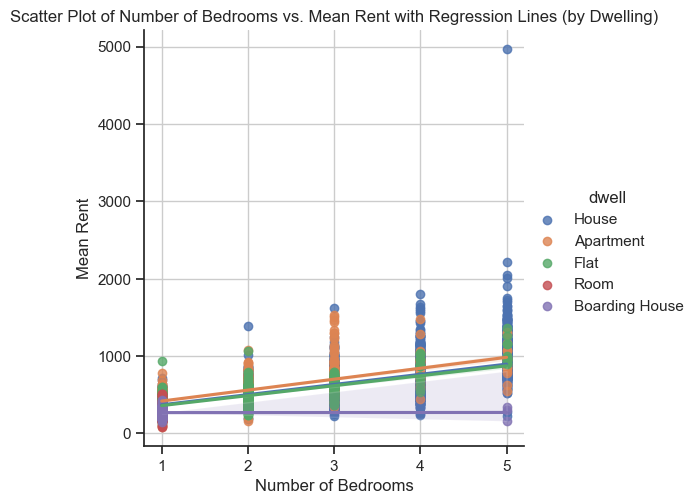

In [31]:
# Set up the lmplot with regression lines for each category in 'Dwelling' column
sns.lmplot(data=merge_df, x='nBedrms', y='mean', hue='dwell', scatter_kws={'alpha':0.8})

# Set labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Rent')
plt.title('Scatter Plot of Number of Bedrooms vs. Mean Rent with Regression Lines (by Dwelling)')

# Show the plot
plt.grid(True)
plt.show()

#### Analyses 4 - Mean rent and standard deviation of rent across number of rooms

As the number of rooms increases, the mean rent prices also tend to increase. This is indicated by the rising trend of the blue bars in the chart.

For properties with 2 and 3 rooms, the standard deviation bars (error bars) are within the upper limit of the corresponding mean rent bars. This suggests that the variability in rent prices for properties with 2 and 3 rooms is relatively moderate and does not significantly exceed the mean rent.

For properties with 4 rooms, the standard deviation bar slightly exceeds the upper limit of the corresponding mean rent bar. This indicates that there is relatively higher variability in rent prices for properties with 4 rooms compared to the mean rent.

For properties with 5 rooms, the standard deviation bar is well within the upper limit of the corresponding mean rent bar. This suggests that the variability in rent prices for properties with 5 rooms is relatively low compared to the mean rent.

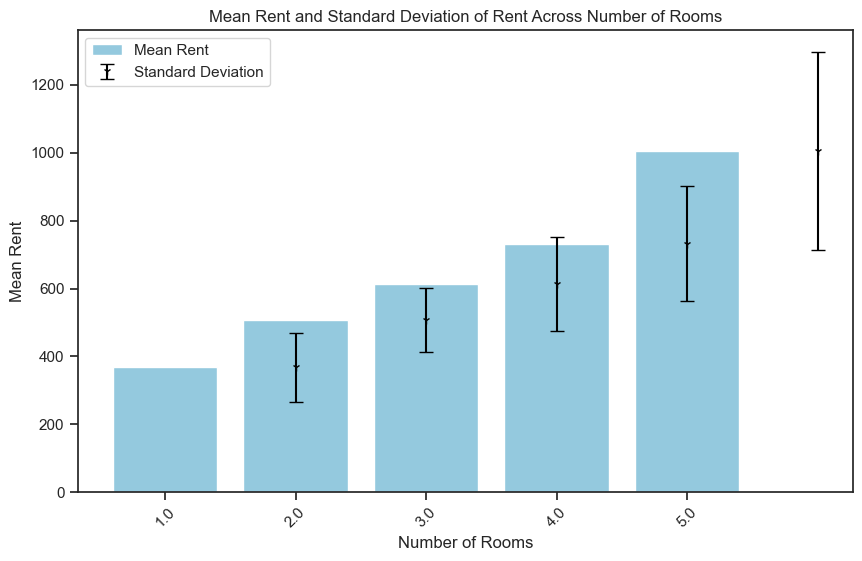

In [34]:
#Segment the data based on number of rooms and calculate mean rent and standard deviation
segmented_data = merge_df.groupby('nBedrms').agg(mean=('mean', 'mean'), sd=('mean', 'std'))

# Reset index to make 'nBedrms' a regular column
segmented_data.reset_index(inplace=True)

# Visualize the comparison using bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='nBedrms', y='mean', data=segmented_data, color='skyblue', label='Mean Rent')
plt.errorbar(x=segmented_data['nBedrms'], y=segmented_data['mean'], yerr=segmented_data['sd'], fmt='1', color='black', capsize=5, label='Standard Deviation')
plt.title('Mean Rent and Standard Deviation of Rent Across Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Mean Rent')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### Analyses 5 - Mean bond/Rent ratio across dwelling types

With the highest bond/rent ratio, apartments seem to have relatively high upfront costs compared to rent.This could be attributed to the amenities, location advantages, and possibly higher demand for apartment living in urban areas.

The higher bond/rent ratio for houses may also reflect stricter rental policies or landlords seeking to mitigate risks associated with property maintenance and potential damages.

Interestingly upfront cost for room is less than boarding house.If someone is seeking accommodation with lower upfront costs, a room would be a better choice than a boarding house.



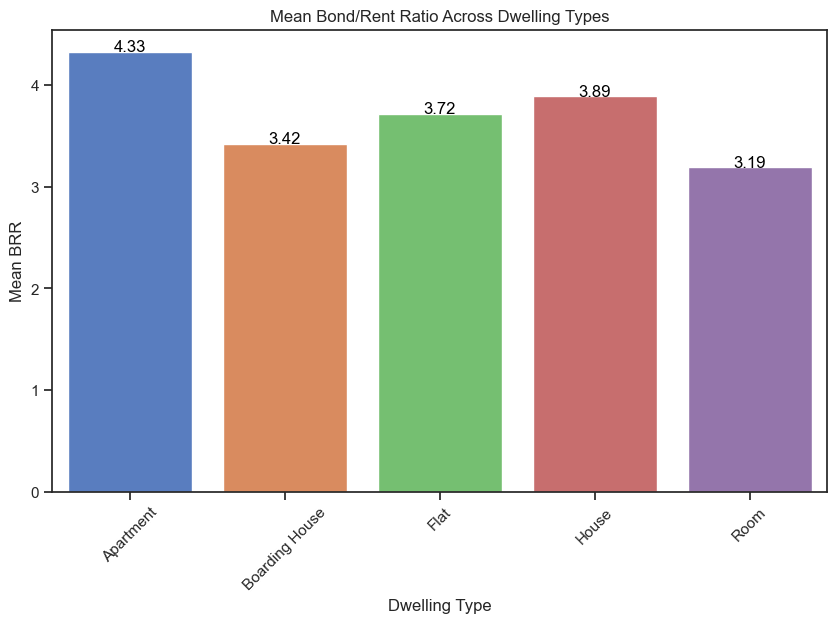

In [35]:
# Group the data by dwelling types and calculate the mean BRR
mean_brr_by_dwelling = merge_df.groupby('dwell')['brr'].mean().reset_index()

# Visualize the comparison using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dwell', y='brr', data=mean_brr_by_dwelling, palette='muted')
plt.title('Mean Bond/Rent Ratio Across Dwelling Types')
plt.xlabel('Dwelling Type')
plt.ylabel('Mean BRR')
plt.xticks(rotation=45)

# Add values on top of the bars
for index, row in mean_brr_by_dwelling.iterrows():
    plt.text(index, row['brr'], round(row['brr'], 2), color='black', ha="center")

plt.show()

### Further studies can be done on this dataset by,

- Enrich the dataset by incorporating additional features, especially broader geographical areas like electoral wards or local boards, demographic information, and detailed property features such as size and amenities. This will enable more comprehensive analyses.
- Source the data through an API to include a time series component, allowing for trend analysis over time. This will provide valuable insights into rental market dynamics and trends.
- Utilize visualization tools such as Power BI to create visually engaging and informative visualizations. These visualizations will offer deeper insights to the rental market audience, facilitating better decision-making and understanding of the data.
- Using other columns within the dataset and clarrifying more info on bond related data in the dataset.
